<a href="https://colab.research.google.com/github/NithderP/NithderP/blob/main/Graph_HW2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graph Analytics - Homework 2

Name: Nithder Pierre

# Problem 1. (15 points each)

Using the NetworkX package on Python (https://networkx.org/), create a graph by import- ing the karate club dataset from inside of the network package and create a directed graph by reading this dataset from the file https://github.com/networkx/networkx/blob/main/ examples/graph/roget_dat.txt.gz.



In [3]:
# Roget Graph

import gzip
import re
import sys

import matplotlib.pyplot as plt
import networkx as nx


def roget_graph():
    """Return the thesaurus graph from the roget.dat example in
    the Stanford Graph Base.
    """
    # open file roget_dat.txt.gz
    fh = gzip.open("roget_dat.txt.gz", "r")

    G_roget = nx.DiGraph()

    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):  # skip comments
            continue
        if line.startswith(" "):  # this is a continuation line, append
            line = oldline + line
        if line.endswith("\\\n"):  # continuation line, buffer, goto next
            oldline = line.strip("\\\n")
            continue

        (headname, tails) = line.split(":")

        # head
        numfind = re.compile(r"^\d+")  # re to find the number of this word
        head = numfind.findall(headname)[0]  # get the number

        G_roget.add_node(head)

        for tail in tails.split():
            if head == tail:
                print("Ignoring self loop", head, tail, file=sys.stderr)
            G_roget.add_edge(head, tail)

    return G_roget


G_roget = roget_graph()

Ignoring self loop 400 400


#Question a
*a1*) Find five nodes with the largest closeness centrality.

*a2*) *Remove* these 5 nodes from the graph and then calculate the number of connected components,

In [4]:
import networkx as nx

# Step 1: Load the Karate Club dataset
G_karate = nx.karate_club_graph()

# Function to find top closeness centrality nodes and calculate connected components after removal
def closeness_centrality_analysis(graph, top_n=5):
    closeness_centrality = nx.closeness_centrality(graph)
    sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
    top_closeness_nodes = [node for node, _ in sorted_closeness[:top_n]]

    graph_copy = graph.copy()
    graph_copy.remove_nodes_from(top_closeness_nodes)
    num_connected_components = nx.number_connected_components(graph_copy)

    return top_closeness_nodes, num_connected_components

# Analyze the Karate Club graph for closeness centrality
karate_top_closeness, karate_closeness_components = closeness_centrality_analysis(G_karate)

# Display results for Karate Club
print("Karate Club - Top 5 Closeness Centrality Nodes:", karate_top_closeness)
print("Connected Components after removal (Closeness):", karate_closeness_components)

# Now for Roget dataset
G_roget_undirected = G_roget.to_undirected()  # Assuming G_roget is already loaded

roget_top_closeness, roget_closeness_components = closeness_centrality_analysis(G_roget_undirected)

# Display results for Roget graph
print("Roget Graph - Top 5 Closeness Centrality Nodes:", roget_top_closeness)
print("Connected Components after removal (Closeness):", roget_closeness_components)


Karate Club - Top 5 Closeness Centrality Nodes: [0, 2, 33, 31, 8]
Connected Components after removal (Closeness): 5
Roget Graph - Top 5 Closeness Centrality Nodes: ['660', '470', '688', '674', '721']
Connected Components after removal (Closeness): 21


#Question b

(b1) Find the three nodes with the largest betweenness centrality.

(b2) Remove these 5 nodes from the graph and then calculate the number of connected components.

In [ ]:
# Function to find top betweenness centrality nodes and calculate connected components after removal
def betweenness_centrality_analysis(graph, top_n=3):
    betweenness_centrality = nx.betweenness_centrality(graph)
    sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    top_betweenness_nodes = [node for node, _ in sorted_betweenness[:top_n]]

    graph_copy = graph.copy()
    graph_copy.remove_nodes_from(top_betweenness_nodes)
    num_connected_components = nx.number_connected_components(graph_copy)

    return top_betweenness_nodes, num_connected_components

# Analyze the Karate Club graph for betweenness centrality
karate_top_betweenness, karate_betweenness_components = betweenness_centrality_analysis(G_karate)

# Display results for Karate Club
print("Karate Club - Top 3 Betweenness Centrality Nodes:", karate_top_betweenness)
print("Connected Components after removal (Betweenness):", karate_betweenness_components)

# Now for Roget dataset
roget_top_betweenness, roget_betweenness_components = betweenness_centrality_analysis(G_roget_undirected)

# Display results for Roget graph
print("Roget Graph - Top 3 Betweenness Centrality Nodes:", roget_top_betweenness)
print("Connected Components after removal (Betweenness):", roget_betweenness_components)


Karate Club - Top 3 Betweenness Centrality Nodes: [0, 33, 32]
Connected Components after removal (Betweenness): 8
Roget Graph - Top 3 Betweenness Centrality Nodes: ['562', '857', '470']
Connected Components after removal (Betweenness): 21


# Question c

(c1) Compute PageRank scores of nodes and print the top 20 nodes with the highest
PageRank score.

(c2) Remove these 20 nodes from the graph and then calculate the number of connected components.

(c3) Plot 3 connected the component with the highest number
of nodes.

Karate Club - Top 20 PageRank Nodes: [33, 0, 32, 2, 1, 31, 23, 3, 5, 13, 8, 6, 25, 29, 27, 7, 30, 10, 4, 16]
Connected Components after removal (PageRank): 14
Roget Graph - Top 20 PageRank Nodes: ['562', '674', '698', '470', '539', '557', '660', '857', '651', '721', '688', '675', '664', '847', '486', '619', '62', '507', '658', '641']
Connected Components after removal (PageRank): 22


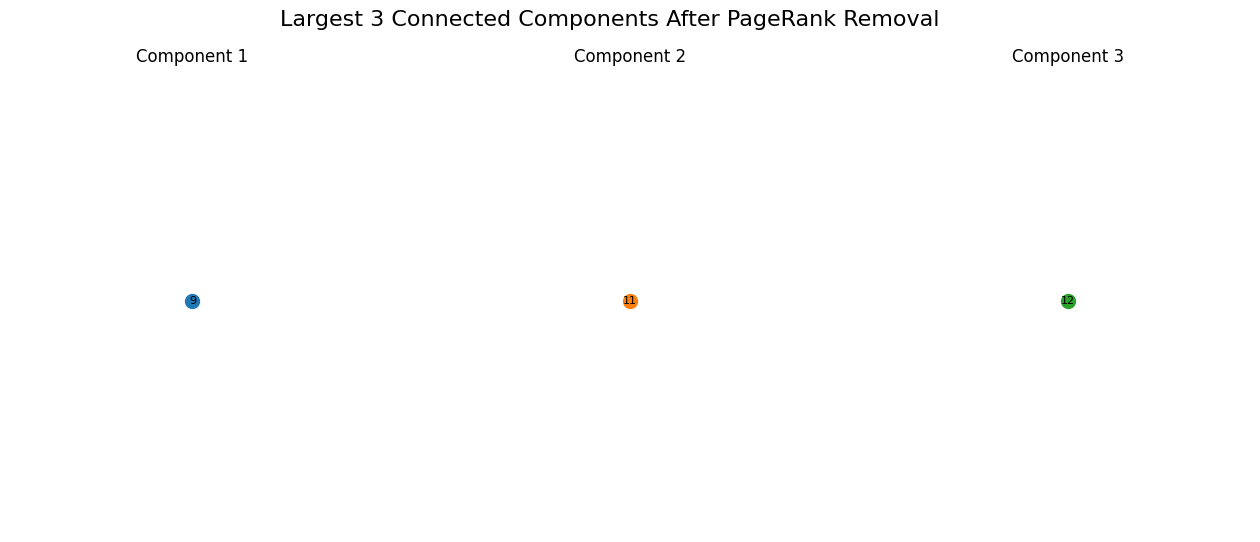

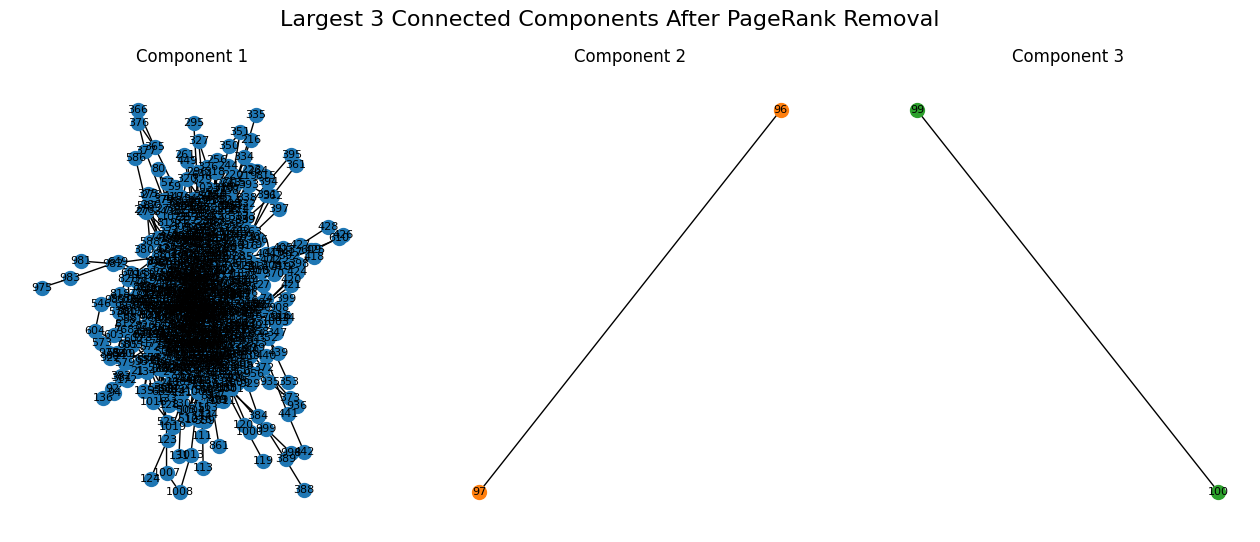

In [5]:
# Function to find top PageRank nodes and calculate connected components after removal
def pagerank_analysis(graph, top_n=20):
    pagerank_scores = nx.pagerank(graph)
    sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
    top_pagerank_nodes = [node for node, _ in sorted_pagerank[:top_n]]

    graph_copy = graph.copy()
    graph_copy.remove_nodes_from(top_pagerank_nodes)
    num_connected_components = nx.number_connected_components(graph_copy)

    return top_pagerank_nodes, num_connected_components, graph_copy

# Analyze the Karate Club graph for PageRank
karate_top_pagerank, karate_pagerank_components, karate_graph_copy_pagerank = pagerank_analysis(G_karate)

# Display results for Karate Club
print("Karate Club - Top 20 PageRank Nodes:", karate_top_pagerank)
print("Connected Components after removal (PageRank):", karate_pagerank_components)

# Now for Roget dataset
roget_top_pagerank, roget_pagerank_components, roget_graph_copy_pagerank = pagerank_analysis(G_roget_undirected)

# Display results for Roget graph
print("Roget Graph - Top 20 PageRank Nodes:", roget_top_pagerank)
print("Connected Components after removal (PageRank):", roget_pagerank_components)

# Function to plot the largest 3 connected components after PageRank removal with separate layout
def plot_largest_components(graph, num_components=3):
    # Find connected components and sort by size (descending)
    components = sorted(nx.connected_components(graph), key=len, reverse=True)

    # Set up the figure
    fig, axes = plt.subplots(1, num_components, figsize=(16, 6))

    # Loop through the largest 'num_components' connected components
    for i, component in enumerate(components[:num_components]):
        subgraph = graph.subgraph(component)
        pos = nx.spring_layout(subgraph)  # Create layout for the component
        ax = axes[i]  # Select the subplot for the current component
        nx.draw(subgraph, pos, with_labels=True, node_color=f"C{i}", ax=ax, node_size=100, font_size=8)
        ax.set_title(f"Component {i+1}")

    plt.suptitle(f"Largest {num_components} Connected Components After PageRank Removal", fontsize=16)
    plt.show()

# Plot the largest 3 connected components for the Karate Club graph
plot_largest_components(karate_graph_copy_pagerank, num_components=3)


# Plot the largest 3 connected components for the Roget graph after PageRank removal
plot_largest_components(roget_graph_copy_pagerank, num_components=3)


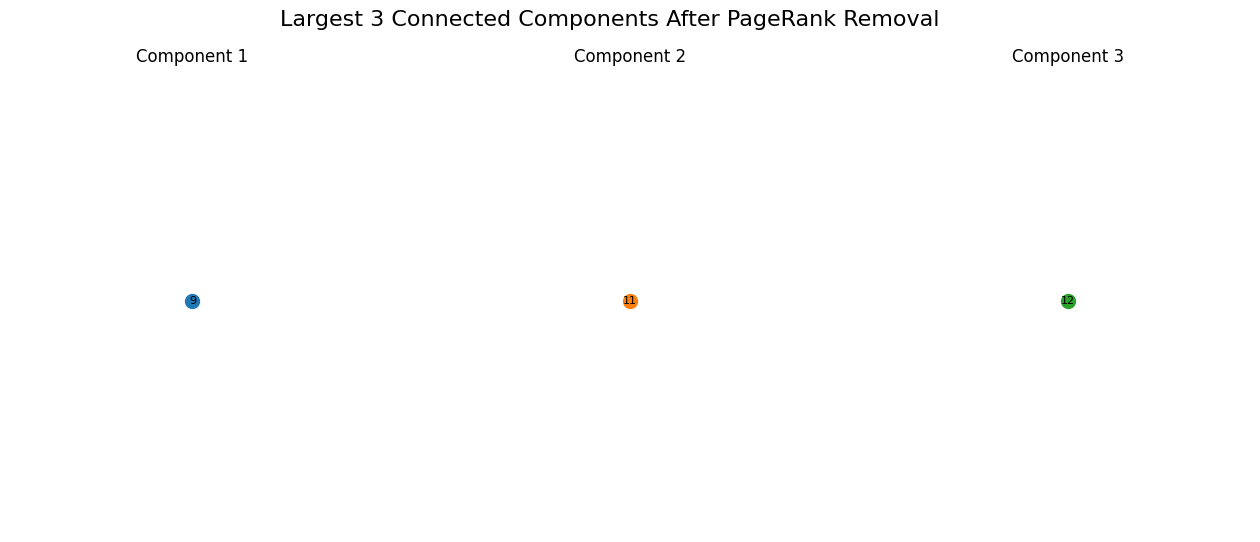

In [6]:
# Function to plot the largest 3 connected components after PageRank removal with separate layout
def plot_largest_components(graph, num_components=3):
    # Find connected components and sort by size (descending)
    components = sorted(nx.connected_components(graph), key=len, reverse=True)

    # Set up the figure
    fig, axes = plt.subplots(1, num_components, figsize=(16, 6))

    # Loop through the largest 'num_components' connected components
    for i, component in enumerate(components[:num_components]):
        subgraph = graph.subgraph(component)
        pos = nx.spring_layout(subgraph)  # Create layout for the component
        ax = axes[i]  # Select the subplot for the current component
        nx.draw(subgraph, pos, with_labels=True, node_color=f"C{i}", ax=ax, node_size=100, font_size=8)
        ax.set_title(f"Component {i+1}")

    plt.suptitle(f"Largest {num_components} Connected Components After PageRank Removal", fontsize=16)
    plt.show()

# Plot the largest 3 connected components for the Karate Club graph
plot_largest_components(karate_graph_copy_pagerank, num_components=3)


# Problem 2.

Use the network generated using email data from a large European research institution in this question. Here is the link for the dataset https://snap.stanford.edu/data/email-Eu-core.html It is a directed graph. Convert it to an undirected graph

In [8]:
# Let's start by using the Girvan-Newman algorithm for community detection and calculating the accuracy using real labels

import networkx as nx
import gzip
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from sklearn.metrics import adjusted_rand_score

# Load the email dataset (edges)
email_edges_file = 'email-Eu-core.txt.gz'
with gzip.open(email_edges_file, 'rt') as f:
    G_email_directed = nx.read_edgelist(f, create_using=nx.DiGraph(), nodetype=int)

# Convert the directed graph to undirected
G_email = G_email_directed.to_undirected()

# Load the department labels
label_file = 'email-Eu-core-department-labels.txt.gz'
with gzip.open(label_file, 'rt') as f:
    labels = {int(line.split()[0]): int(line.split()[1]) for line in f}

# Assign the department labels to the nodes in the graph
nx.set_node_attributes(G_email, labels, 'department')



# Question a (15pts)

(a) Use the Girvan-Newman algorithm for community detection on the email dataset and plot the committees with different colors Calculate the accuracy for the communities using real labels.

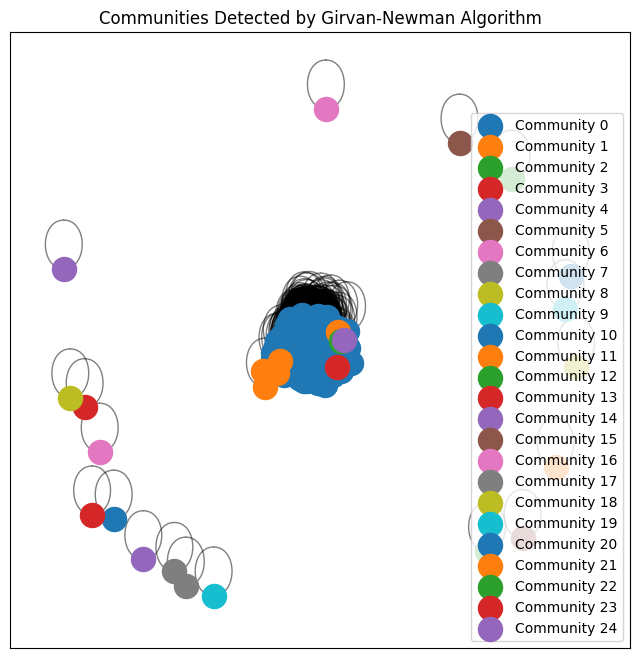

-0.0011952482211624244

In [ ]:
# Girvan-Newman community detection with a limited number of splits
def girvan_newman_limited(graph, num_splits=5):  # Increase the number of splits to 5
    comp = girvan_newman(graph)
    for i in range(num_splits):
        communities = next(comp)
    return communities

# Detect the communities with Girvan-Newman algorithm (limiting to 5 splits)
communities = girvan_newman_limited(G_email, num_splits=5)
communities = [list(c) for c in communities]

# Plot the communities with different colors
def plot_communities(G, communities):
    pos = nx.spring_layout(G, seed=42)  # Seed for consistent layouts
    plt.figure(figsize=(8, 8))
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=f"C{i}", label=f"Community {i}")
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.legend()
    plt.title("Communities Detected by Girvan-Newman Algorithm")
    plt.show()

# Plot the communities
plot_communities(G_email, communities)

# Get a list of actual labels from the graph (for accuracy comparison)
actual_labels = [G_email.nodes[node]['department'] for node in G_email.nodes]

# Assign detected labels to each node based on its community
detected_labels = [0] * len(G_email)
for i, community in enumerate(communities):
    for node in community:
        detected_labels[node] = i

# Calculate the Adjusted Rand Index (accuracy)
ari_score = adjusted_rand_score(actual_labels, detected_labels)
ari_score

# Question b (15 pts)

(b) Find the k-core decomposition of the graph.

In [ ]:
# Let's calculate the number of nodes and edges in each k-core subgraph
# Remove self-loops from the graph and recalculate k-core decomposition
G_email_no_selfloops = G_email.copy()
G_email_no_selfloops.remove_edges_from(nx.selfloop_edges(G_email_no_selfloops))

# Compute the k-core decomposition of the graph without self-loops
k_core_decomposition = nx.core_number(G_email_no_selfloops)

# Print the k-core decomposition for the first few nodes
k_core_decomposition_output = list(k_core_decomposition.items())[:10]  # Display first 10 nodes for brevity
k_core_decomposition_output

# Find the unique core numbers
unique_cores = set(k_core_decomposition.values())

# Dictionary to store core number with its corresponding node and edge count
core_info = {}

# Loop over each unique core number and extract the subgraph
for core_num in unique_cores:
    # Extract the subgraph for the current core number
    core_subgraph = G_email_no_selfloops.subgraph([node for node, core in k_core_decomposition.items() if core == core_num])

    # Store the number of nodes and edges in the current core
    core_info[core_num] = {
        "nodes": core_subgraph.number_of_nodes(),
        "edges": core_subgraph.number_of_edges()
    }

# Convert the dictionary to a sorted list by core number and display
sorted_core_info = sorted(core_info.items(), key=lambda x: x[0])
sorted_core_info


[(0, {'nodes': 19, 'edges': 0}),
 (1, {'nodes': 95, 'edges': 0}),
 (2, {'nodes': 37, 'edges': 1}),
 (3, {'nodes': 37, 'edges': 1}),
 (4, {'nodes': 33, 'edges': 8}),
 (5, {'nodes': 29, 'edges': 0}),
 (6, {'nodes': 20, 'edges': 1}),
 (7, {'nodes': 21, 'edges': 1}),
 (8, {'nodes': 25, 'edges': 3}),
 (9, {'nodes': 18, 'edges': 5}),
 (10, {'nodes': 16, 'edges': 3}),
 (11, {'nodes': 23, 'edges': 7}),
 (12, {'nodes': 14, 'edges': 5}),
 (13, {'nodes': 17, 'edges': 5}),
 (14, {'nodes': 15, 'edges': 4}),
 (15, {'nodes': 10, 'edges': 4}),
 (16, {'nodes': 24, 'edges': 11}),
 (17, {'nodes': 25, 'edges': 14}),
 (18, {'nodes': 37, 'edges': 29}),
 (19, {'nodes': 29, 'edges': 24}),
 (20, {'nodes': 28, 'edges': 45}),
 (21, {'nodes': 39, 'edges': 81}),
 (22, {'nodes': 8, 'edges': 1}),
 (23, {'nodes': 26, 'edges': 19}),
 (24, {'nodes': 19, 'edges': 14}),
 (25, {'nodes': 28, 'edges': 32}),
 (26, {'nodes': 26, 'edges': 43}),
 (27, {'nodes': 59, 'edges': 313}),
 (28, {'nodes': 16, 'edges': 21}),
 (29, {'node

#Question c (20pts)

(c) Consider each connected component of the 5-core subgraph as a community and
calculate the modularity of this partition to measure the quality of the communities.

In [ ]:
import networkx as nx
from networkx.algorithms import community

# Extract the 5-core subgraph
five_core_subgraph = nx.k_core(G_email_no_selfloops, k=5)

# Find the connected components of the 5-core subgraph, treating each as a community
five_core_communities = list(nx.connected_components(five_core_subgraph))

# Calculate the modularity of the partition using the connected components as communities
modularity_score = community.modularity(five_core_subgraph, five_core_communities)

# Output the modularity score
print(f"Modularity of the 5-core subgraph communities: {modularity_score}")


Modularity of the 5-core subgraph communities: 0.0


#Question d (15 pts)

(d) Find the node with the highest degree centrality. Find the 5-core community it belongs to.

In [ ]:
import networkx as nx

# Calculate degree centrality for the entire graph (G_email_no_selfloops)
degree_centrality = nx.degree_centrality(G_email_no_selfloops)

# Find the node with the highest degree centrality
highest_degree_node = max(degree_centrality, key=degree_centrality.get)
print(f"Node with the highest degree centrality: {highest_degree_node}")

# Extract the 5-core subgraph
five_core_subgraph = nx.k_core(G_email_no_selfloops, k=5)

# Find the connected components (communities) in the 5-core subgraph
five_core_communities = list(nx.connected_components(five_core_subgraph))

# Identify the community of the highest degree node
community_of_highest_degree_node = [
    community for community in five_core_communities if highest_degree_node in community
]

# Output the results
print(f"Community of the node with highest degree centrality: {community_of_highest_degree_node}")


Node with the highest degree centrality: 160
Community of the node with highest degree centrality: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,